<a href="https://colab.research.google.com/github/alwinbahari/kuliah/blob/main/CNN_dengan_data_MNIST_(2111600512).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


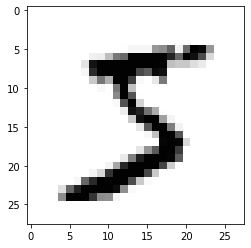

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4676 - accuracy: 0.8768


In [7]:
model_lr = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

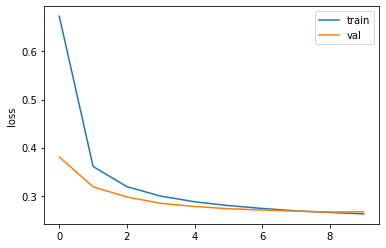

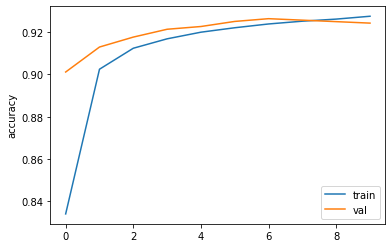

In [10]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
model_lr.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9242


[0.26660922169685364, 0.9241999983787537]

1/1 [==============================] - 0s 20ms/step
[1.1082034e-05 3.5089265e-10 3.0378023e-05 5.6977514e-03 8.6714891e-07
 3.4950022e-05 1.9734883e-09 9.9353737e-01 3.3341912e-05 6.5432064e-04]  =>  7


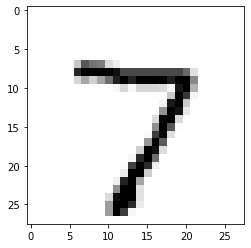

[8.8303274e-04 1.0315648e-05 9.8652285e-01 1.1597367e-03 8.1053377e-13
 5.1491498e-03 6.1245454e-03 7.8741665e-15 1.5041383e-04 2.2107195e-11]  =>  2


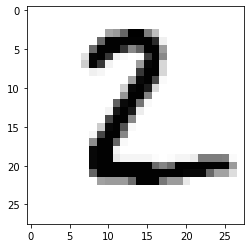

[7.7509203e-06 9.7516078e-01 1.3142399e-02 3.1132896e-03 1.8466795e-04
 8.1285677e-04 1.1622689e-03 1.8040063e-03 4.2263800e-03 3.8563370e-04]  =>  1


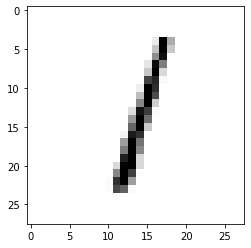

[9.9981374e-01 3.3420926e-11 2.9649233e-05 3.3757356e-06 2.6307635e-08
 6.9277063e-05 5.3248841e-05 9.7400161e-06 1.1202514e-05 9.7739976e-06]  =>  0


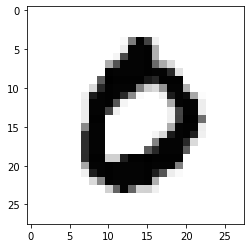

[4.7707657e-04 7.8925501e-07 1.6285360e-03 5.0403574e-05 9.6319789e-01
 1.3055328e-04 1.5033412e-03 2.5591641e-03 3.5742135e-03 2.6877990e-02]  =>  4


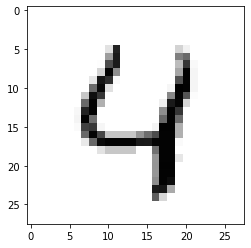

[3.7587728e-07 9.9229211e-01 1.6945173e-03 1.3909704e-03 1.5053434e-05
 4.1078540e-05 1.9099942e-05 2.2175906e-03 1.9275345e-03 4.0175565e-04]  =>  1


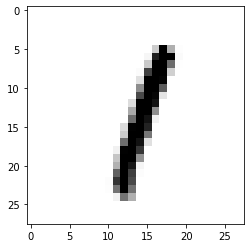

[2.4081940e-06 2.8952655e-07 7.2598954e-07 1.4543593e-04 9.7941381e-01
 3.0186744e-03 3.0929506e-05 7.4087275e-04 8.2456339e-03 8.4011555e-03]  =>  4


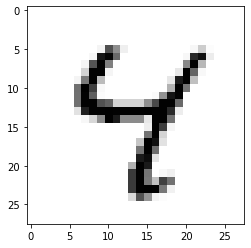

In [14]:
probs = model_lr.predict(x_test[:7])
preds = np.argmax(probs, axis=1)
for i in range(7):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap="Greys")
    plt.show()

In [15]:
model_lr.predict(x_test[18].reshape(1,28,28))

1/1 [==============================] - 0s 35ms/step


array([[1.5580973e-04, 1.6097158e-05, 1.0140440e-01, 8.0985653e-01,
        3.3883957e-04, 4.8900593e-02, 9.7458614e-03, 2.4193474e-05,
        2.9541321e-02, 1.6328617e-05]], dtype=float32)

In [16]:
model_lr.predict(x_test[18:19])

1/1 [==============================] - 0s 35ms/step


array([[1.5580973e-04, 1.6097158e-05, 1.0140440e-01, 8.0985653e-01,
        3.3883957e-04, 4.8900593e-02, 9.7458614e-03, 2.4193474e-05,
        2.9541321e-02, 1.6328617e-05]], dtype=float32)

In [17]:
model_mlp = tf.keras.models.Sequential([
        layers.Input(x_train.shape[1:]),
        layers.Flatten(),
        layers.Dense(64, activation='elu'),
        layers.Dense(64, activation='elu'),
        layers.Dense(10, activation='softmax')
    ])
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False)

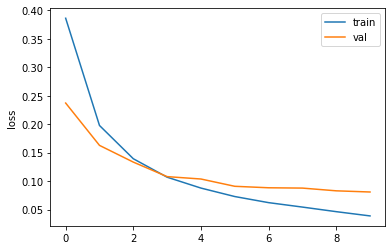

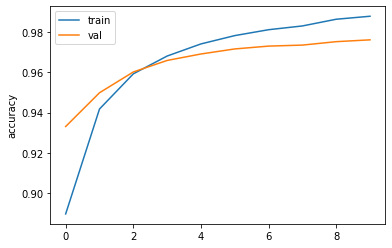

In [19]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()